<a href="https://colab.research.google.com/github/edabezek/MachineLearning/blob/main/ReinforcedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##random selection uygulaması 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('Ads_CTR_Optimisation.csv')


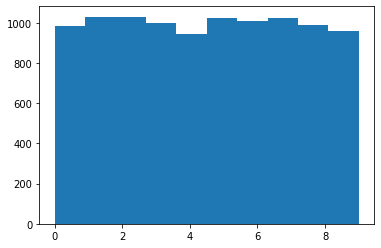

In [ ]:

import random

N = 10000
d = 10 
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    toplam = toplam + odul
    
    
plt.hist(secilenler)
plt.show()
#grafik her bir ilandan ne kadar seçildiğini gösteriyor.

Toplam Odul:
2231


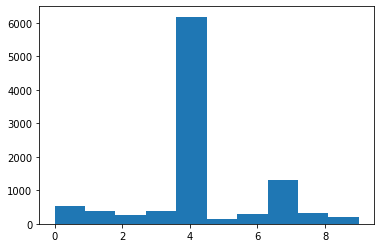

In [ ]:
import math
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(n)
oduller = [0] * d #ilk basta butun ilanların odulu 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam odul
secilenler = []
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

plt.hist(secilenler)
plt.show()


4 nolu değişken yani ad5 toplamda 2695 tıklama vardı. toplam ödülümüz 2231 çıktı grafikte 4 ü işaret ediyor.

Thompson Örneklemesi (Sampling)

Toplam Odul:
2625


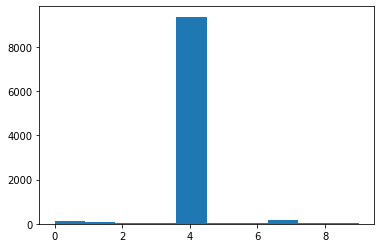

In [ ]:
import random
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(
#Ni(n)
toplam = 0 # toplam odul
secilenler = []
birler = [0] * d
sifirlar = [0] * d
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_th = 0
    for i in range(0,d):
        rasbeta = random.betavariate ( birler[i] + 1 , sifirlar[i] +1)
        if rasbeta > max_th:
            max_th = rasbeta
            ad = i
    secilenler.append(ad)
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    if odul == 1:
        birler[ad] = birler[ad]+1
    else :
        sifirlar[ad] = sifirlar[ad] + 1
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

plt.hist(secilenler)
plt.show()

burada ödül daha yüksek geldi daha başarılı diyebiliriz. sebebi arakadaki dağılımdan kaynaklı ucb ile diğer şeyler aynı .